In this part we will try to create a model that can predict the outcome of the westren meta based on the japanese and previous metas.

we will try only until BT8 as EX2 is still too new for training (not enough competetive decks)

In [24]:
import os                          
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
def load_dataset(file_name, target_column):
    df =  pd.read_csv(file_name)
    TRAINING_FEATURES = df.columns[df.columns != target_column]
    X = df[TRAINING_FEATURES]
    y = df[target_column]
    return X,y

In [26]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = rand_state)
    return X_train, X_test, y_train, y_test

In [27]:
def train_Linear(X_train, y_train):
    clf = LinearRegression().fit(X_train, y_train)
    return clf

In [28]:
def train_Logistic(X_train, y_train):
    clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
    return clf

In [29]:
def predict(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    return resDF

In [30]:
def calc_evaluation_val(eval_metric, y_test, y_predicted):
    if eval_metric == 'accuracy':
        return accuracy_score(y_test, y_predicted)
    if eval_metric == 'precision':
        return precision_score(y_test, y_predicted)
    if eval_metric == 'recall':
        return recall_score(y_test, y_predicted)
    if eval_metric == 'f1':
        return f1_score(y_test, y_predicted)
    if eval_metric == 'confusion_matrix':
        return confusion_matrix(y_test, y_predicted)

First lets try to see the resoult of a liniar regression meta by meta from BT3 until BT8

0.4664434072213669


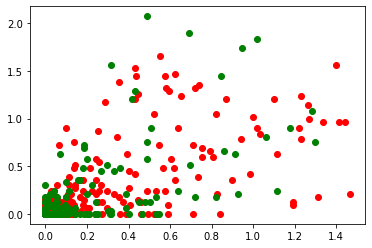

In [31]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks1'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks2', axis=1, inplace=True)
X.drop('west_meta_decks3', axis=1, inplace=True)
X.drop('west_meta_decks4', axis=1, inplace=True)
X.drop('west_meta_decks5', axis=1, inplace=True)
X.drop('west_meta_decks6', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks2', axis=1, inplace=True)
X.drop('jp_meta_decks3', axis=1, inplace=True)
X.drop('jp_meta_decks4', axis=1, inplace=True)
X.drop('jp_meta_decks5', axis=1, inplace=True)
X.drop('jp_meta_decks6', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt3 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt3, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks1'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks1'], y_test, color = 'g')
plt.show()

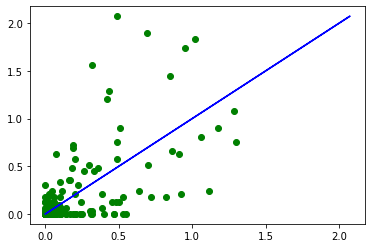

In [32]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks1'], y_test, color = 'g')
plt.show()

0.7108787829997907


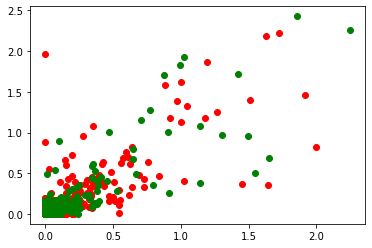

In [33]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks2'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks3', axis=1, inplace=True)
X.drop('west_meta_decks4', axis=1, inplace=True)
X.drop('west_meta_decks5', axis=1, inplace=True)
X.drop('west_meta_decks6', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks3', axis=1, inplace=True)
X.drop('jp_meta_decks4', axis=1, inplace=True)
X.drop('jp_meta_decks5', axis=1, inplace=True)
X.drop('jp_meta_decks6', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt4 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt4, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)

print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks2'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks2'], y_test, color = 'g')
plt.show()

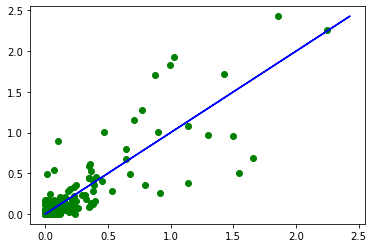

In [34]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks2'], y_test, color = 'g')
plt.show()

0.7568856039077536


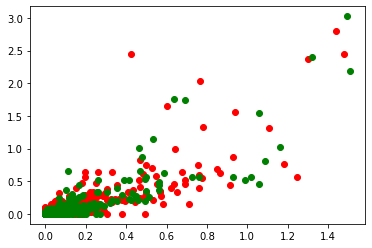

In [35]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks3'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks4', axis=1, inplace=True)
X.drop('west_meta_decks5', axis=1, inplace=True)
X.drop('west_meta_decks6', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks4', axis=1, inplace=True)
X.drop('jp_meta_decks5', axis=1, inplace=True)
X.drop('jp_meta_decks6', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt5 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt5, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks3'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks3'], y_test, color = 'g')
plt.show()

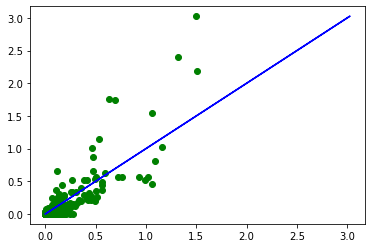

In [36]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks3'], y_test, color = 'g')
plt.show()

0.8063320882044402


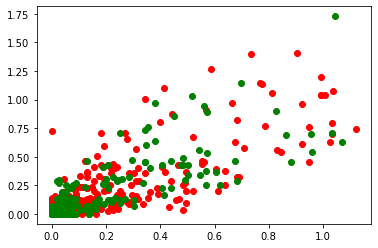

In [37]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks4'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks5', axis=1, inplace=True)
X.drop('west_meta_decks6', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks5', axis=1, inplace=True)
X.drop('jp_meta_decks6', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt6 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt6, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks4'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks4'], y_test, color = 'g')
plt.show()

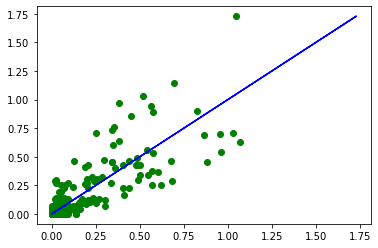

In [38]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks4'], y_test, color = 'g')
plt.show()

0.657625542740987


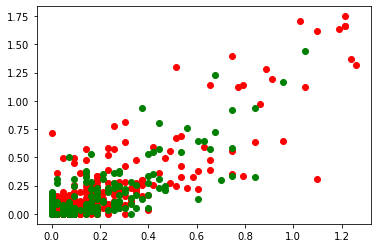

In [39]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks5'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks6', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks6', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_ex1 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_ex1, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks5'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks5'], y_test, color = 'g')
plt.show()

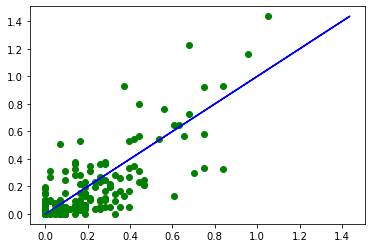

In [40]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks5'], y_test, color = 'g')
plt.show()

0.18337344198553684


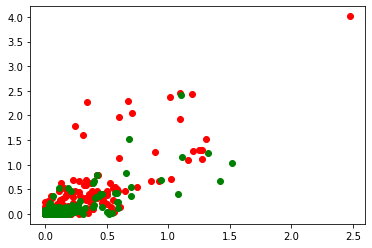

In [41]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks6'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks7', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks7', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt7 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt7, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks6'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks6'], y_test, color = 'g')
plt.show()

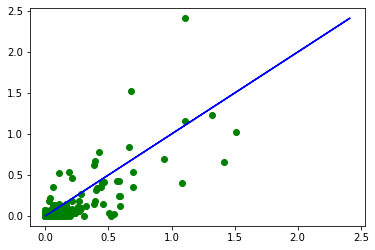

In [42]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks6'], y_test, color = 'g')
plt.show()

0.5471311734731268


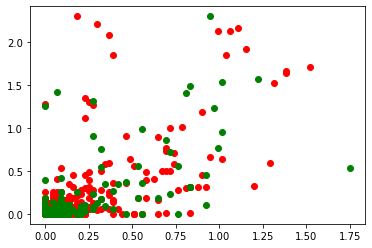

In [43]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks7'
X, y = load_dataset(file_name, category_col_name)
X.drop('card_color', axis=1, inplace=True)
X.drop('card_name', axis=1, inplace=True)
X.drop('west_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks8', axis=1, inplace=True)
X.drop('jp_meta_decks9', axis=1, inplace=True)
X.drop('jp_meta_decks10', axis=1, inplace=True)

X_until_bt8 = X.copy()
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt8, y, 0.35, 42)
classification_model = train_Linear(X_train, y_train)
df_res = predict(classification_model, X_test, y_test)
print(classification_model.score(X_test,y_test))

plt.scatter(X_train['jp_meta_decks7'], y_train, color = 'r')
plt.scatter(X_test['jp_meta_decks7'], y_test, color = 'g')
plt.show()

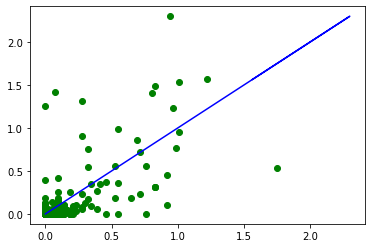

In [44]:
prediction = df_res['Actual'].values.reshape(-1,1)
plt.plot(df_res['Actual'], prediction, color = 'b')
plt.scatter(X_test['jp_meta_decks7'], y_test, color = 'g')
plt.show()

As we can see BT4,5,6 were higly accurate in predicting the westren meta but from ex1 we saw a declin in while BT7 being 
extremly non accurate.
I belive the resason for that are the restrictions made on some cards that didnt happen in japan in bt7 meta but did hit in 
the west.

Now lets try a different approch.
instead of predicting the cards playability we will try to use Logistic regression and just determine if a card is playable in
the meta.

We will say any card that saw 5% playability is playable while the rest are not.

In [45]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks7'
X, y = load_dataset(file_name, category_col_name)

X_until_bt8_log = X.copy()
X_until_bt8_log.drop('west_meta_decks8', axis=1, inplace=True)
X_until_bt8_log.drop('jp_meta_decks8', axis=1, inplace=True)
X_until_bt8_log.drop('jp_meta_decks9', axis=1, inplace=True)
X_until_bt8_log.drop('jp_meta_decks10', axis=1, inplace=True)
X_until_bt8_log.drop('card_color', axis=1, inplace=True)
X_until_bt8_log.drop('card_name', axis=1, inplace=True)

for i in range (1, 7):
    X_until_bt8_log['west_meta_decks'+str(i)].values[X_until_bt8_log['west_meta_decks'+str(i)] >= 0.05] = 1
    X_until_bt8_log['west_meta_decks'+str(i)].values[X_until_bt8_log['west_meta_decks'+str(i)] < 0.05] = 0
    X_until_bt8_log['jp_meta_decks'+str(i)].values[X_until_bt8_log['jp_meta_decks'+str(i)] >= 0.05] = 1
    X_until_bt8_log['jp_meta_decks'+str(i)].values[X_until_bt8_log['jp_meta_decks'+str(i)] < 0.05] = 0
X_until_bt8_log['jp_meta_decks'+str(7)].values[X_until_bt8_log['jp_meta_decks'+str(7)] >= 0.05] = 1
X_until_bt8_log['jp_meta_decks'+str(7)].values[X_until_bt8_log['jp_meta_decks'+str(7)] < 0.05] = 0

for i in range (0,len(y)):
    if y[i] >= 0.05:
        y[i] = 1
    else:
        y[i] = 0
        
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt8_log, y, 0.35, 42)

classification_model = train_Logistic(X_train, y_train)

df_res = predict(classification_model, X_test, y_test)


In [46]:
eval_metric1 = 'accuracy'

eval_metric2 = 'precision'

eval_metric3 = 'recall'

eval_metric4 = 'f1'

eval_metric5 = 'confusion_matrix'

print(eval_metric1,':',calc_evaluation_val(eval_metric1, y_test, df_res['Predicted']))
print(eval_metric2,':',calc_evaluation_val(eval_metric2, y_test, df_res['Predicted']))
print(eval_metric3,':',calc_evaluation_val(eval_metric3, y_test, df_res['Predicted']))
print(eval_metric4,':',calc_evaluation_val(eval_metric4, y_test, df_res['Predicted']))

print(eval_metric5,':','\n',calc_evaluation_val(eval_metric5, y_test, df_res['Predicted']))

accuracy : 0.8866171003717472
precision : 0.6206896551724138
recall : 0.48
f1 : 0.5413533834586466
confusion_matrix : 
 [[441  22]
 [ 39  36]]


As we can see while the model is highly accurate and pretty precise there is a high number of false positives.
I belive that this is the result of the restrictions and banlist of cards that came late to japan and in waves to the west (up until BT8) that made the meta way more different and unpredictable.

But if the trend up from BT7 is to be belived the next sets will be more predictable again as long as there wont be any drastic changes in the meta like with the restrictions and banlist.

In [47]:
file_name = 'file5.csv'
category_col_name = 'west_meta_decks4'
X, y = load_dataset(file_name, category_col_name)

X_until_bt6_log = X.copy()
X_until_bt6_log.drop('west_meta_decks5', axis=1, inplace=True)
X_until_bt6_log.drop('west_meta_decks6', axis=1, inplace=True)
X_until_bt6_log.drop('west_meta_decks7', axis=1, inplace=True)
X_until_bt6_log.drop('west_meta_decks8', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks5', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks6', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks7', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks8', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks9', axis=1, inplace=True)
X_until_bt6_log.drop('jp_meta_decks10', axis=1, inplace=True)
X_until_bt6_log.drop('card_color', axis=1, inplace=True)
X_until_bt6_log.drop('card_name', axis=1, inplace=True)

for i in range (1, 3):
    X_until_bt6_log['west_meta_decks'+str(i)].values[X_until_bt6_log['west_meta_decks'+str(i)] >= 0.05] = 1
    X_until_bt6_log['west_meta_decks'+str(i)].values[X_until_bt6_log['west_meta_decks'+str(i)] < 0.05] = 0
    X_until_bt6_log['jp_meta_decks'+str(i)].values[X_until_bt6_log['jp_meta_decks'+str(i)] >= 0.05] = 1
    X_until_bt6_log['jp_meta_decks'+str(i)].values[X_until_bt6_log['jp_meta_decks'+str(i)] < 0.05] = 0
X_until_bt6_log['jp_meta_decks'+str(4)].values[X_until_bt6_log['jp_meta_decks'+str(4)] >= 0.05] = 1
X_until_bt6_log['jp_meta_decks'+str(4)].values[X_until_bt6_log['jp_meta_decks'+str(4)] < 0.05] = 0

for i in range (0,len(y)):
    if y[i] >= 0.05:
        y[i] = 1
    else:
        y[i] = 0
        
X_train, X_test, y_train, y_test = split_to_train_and_test(X_until_bt6_log, y, 0.35, 42)

classification_model = train_Logistic(X_train, y_train)

df_res = predict(classification_model, X_test, y_test)

In [48]:
eval_metric1 = 'accuracy'

eval_metric2 = 'precision'

eval_metric3 = 'recall'

eval_metric4 = 'f1'

eval_metric5 = 'confusion_matrix'

print(eval_metric1,':',calc_evaluation_val(eval_metric1, y_test, df_res['Predicted']))
print(eval_metric2,':',calc_evaluation_val(eval_metric2, y_test, df_res['Predicted']))
print(eval_metric3,':',calc_evaluation_val(eval_metric3, y_test, df_res['Predicted']))
print(eval_metric4,':',calc_evaluation_val(eval_metric4, y_test, df_res['Predicted']))

print(eval_metric5,':','\n',calc_evaluation_val(eval_metric5, y_test, df_res['Predicted']))

accuracy : 0.912639405204461
precision : 0.7864077669902912
recall : 0.7641509433962265
f1 : 0.7751196172248804
confusion_matrix : 
 [[410  22]
 [ 25  81]]


This is how the model should work if there wont be a new banlist or restrictions for a long enough time